# Insure your life with medical insurance
> Health Insurance is a type of insurance that offers coverage to the policy holder for medical expenses in case of a health emergency. A health insurance plan chosen by the insured provides coverage for different expenses including surgical expenses, day-care expenses, and critical illness etc.

# Importing dependencies

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Loading data

In [75]:
# load train data
df = pd.read_csv("./Train_Data.csv")
# load test data
df_test = pd.read_csv("./Test_Data.csv")
fields = df.columns

# load kaggle data available here https://www.kaggle.com/mirichoi0218/insurance
df_kaggle = pd.read_csv("insurance.csv")

# align kaggle dataframe columns with that of competition columns
df_kaggle = df_kaggle[fields]

# full outer join
df = pd.concat([df, df_kaggle])
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


# Removing  Duplicate Rows (*offers significant boost on leaderboard)

In [76]:
df.drop_duplicates(keep='first', inplace=True) # There are total of 1733 duplicated rows

# Round off age value in competition data(*offers significant boost on leaderboard)

As competition data contains floating values for age, we will just round it off to make it integer (to match kaggle data). I have tried taking floor and ceil values as well, didn't work better than rounding it off.


In [77]:
# round off the age columns for train and test set
df["age"] = df.age.round()
df_test["age"] = df_test.age.round()

# Graphical analysis

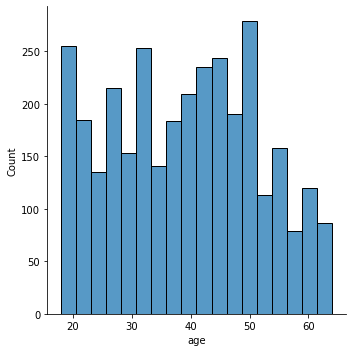

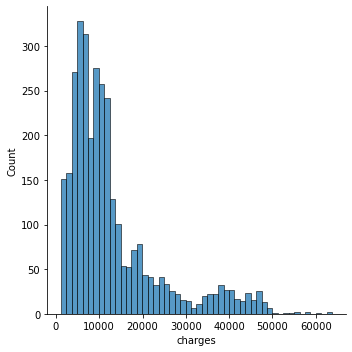

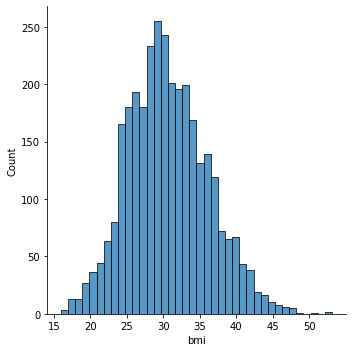

In [78]:
sns.displot(df.age)
sns.displot(df.charges)
sns.displot(df.bmi)

# Observation
BMI body mass index is the ratio of weight to the height.
> Adult Body Mass Index
BMI is a person's weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness

* Age variable is roughly uniformly distribution
* Charges variable is postively skewed (more occurence of smaller charges amount)
* BMI is roughly normally distributed. (but it is not so normal, the values is centered at "obese" weight_status)

(I wonder if we could somehow roughly estimate the weight and height of a person given BMI

# Adding weight status feature
We will group people based on BMI.
underweight, normal, overweight and obese based on BMI value.

Underweight: [0-18.5)

Normal : [18.5, 25)

Overweight : [25, 30)

Obese : [30+]

In [79]:
def add_weight_status(df):
  # grouping based on the body max index
  col_list = ["underweight", "normal", "overweight", "obese"]
  for col in col_list:
    df[col] = 0
  df["weight_status"] = 0
  # mark weight status
  df.loc[df.bmi < 18.5, "underweight"] = 1
  df.loc[df.bmi < 18.5, "weight_status"] = "underweight"

  df.loc[(df.bmi >= 18.5) &  (df.bmi < 25), "normal"] = 1
  df.loc[(df.bmi >= 18.5) &  (df.bmi < 25), "weight_status"] = "normal"

  df.loc[(df.bmi >= 25) &  (df.bmi < 30), "overweight"] = 1
  df.loc[(df.bmi >= 25) &  (df.bmi < 30), "weight_status"] = "overweight"

  df.loc[(df.bmi >= 30), "obese"]= 1
  df.loc[(df.bmi >= 30), "weight_status"]= "obese"

# add weight status feature to train set
add_weight_status(df)

# add weight status  feature to test set
add_weight_status(df_test)

<AxesSubplot:xlabel='weight_status', ylabel='count'>

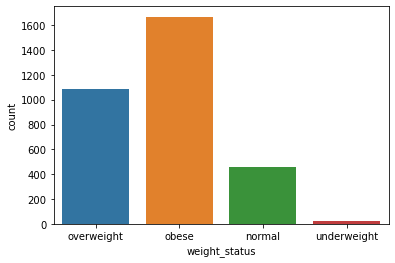

In [80]:
sns.countplot(x= df.weight_status)

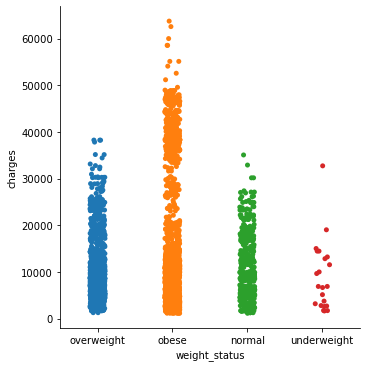

In [81]:
sns.catplot(y= "charges",x= "weight_status", data= df)

 # Observation
 * This dataset has more instances of over weighted people (overweight + obese).
 * Weight status and charges are positively coorelated, Weight causes health problems and hence more charges(*overall).
 
 Here is a quote from ["The Health Effects of Overweight and Obesity"](https://www.cdc.gov/healthyweight/effects/index.html) article:
 
 > People who have obesity, compared to those with a normal or healthy weight, are at increased risk for many serious diseases and health conditions, including the following:
    * All-causes of death (mortality)
    * High blood pressure (Hypertension)
    * High LDL cholesterol, low HDL cholesterol, or high levels of triglycerides (Dyslipidemia)
    * Type 2 diabetes
    * Coronary heart disease
    * Stroke
    * Gallbladder disease
    * Osteoarthritis (a breakdown of cartilage and bone within a joint)
    * Sleep apnea and breathing problems
    * Many types of cancerexternal icon
    * Low quality of life
    * Mental illness such as clinical depression, anxiety, and other mental disorders
    * Body pain and difficulty with physical functioning

# Stages of life
Everybody goes through stages of life. Its wonderful experience and each stage demands different version of you.

We will group people based their age range.

Infant: [0-2)

Toddler : [2, 5)

Child : [5, 13)

Teen : [13- 20)

Adult : [20, 40)

Middle Age_Adult : [40, 60)

Senior Adult : [60+]

In [82]:
def add_stages_of_life(df):
  # stages of life based on the age
  col_list = ["infant", "toddler", "child", "teen", "adult", "middle_age_adult", "senior_adult"]
  for col in col_list:
    df[col] = 0
  df["stage_of_life"] = 0


  df.loc[(df.age >= 0) & (df.age < 2), "infant"] = 1
  df.loc[(df.age >= 0) & (df.age < 2), "stage_of_life"] = "infant"

  df.loc[(df.age >= 2) & (df.age < 5), "toddler"] = 1
  df.loc[(df.age >= 2) & (df.age < 5), "stage_of_life"] = "toddler"

  df.loc[(df.age >= 5) & (df.age < 13), "child"] = 1
  df.loc[(df.age >= 5) & (df.age < 13), "stage_of_life"] = "child"

  df.loc[(df.age >= 13) & (df.age < 20), "teen"] = 1
  df.loc[(df.age >= 13) & (df.age < 20), "stage_of_life"] = "teen"

  df.loc[(df.age >= 20) &  (df.age < 40), "adult"] = 1
  df.loc[(df.age >= 20) &  (df.age < 40), "stage_of_life"] = "adult"

  df.loc[(df.age >= 40) &  (df.age < 60), "middle_age_adult"] = 1
  df.loc[(df.age >= 40) &  (df.age < 60), "stage_of_life"] = "middle_age_adult"
  
  # This mistake yield better results, wonder if grouping people differently would work
  '''
  df.loc[(df.age >= 30), "senior_adult"]= 1
  df.loc[(df.age >= 30), "stage_of_life"]= "senior_adult"
  '''

  df.loc[(df.age >= 60), "senior_adult"]= 1
  df.loc[(df.age >= 60), "stage_of_life"]= "senior_adult"

add_stages_of_life(df)
add_stages_of_life(df_test)

<AxesSubplot:xlabel='stage_of_life', ylabel='charges'>

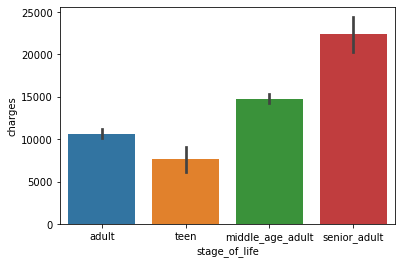

In [83]:
sns.barplot(y= "charges",x= "stage_of_life", data= df)

# Observation
* As expected, as you grow older, it is likely that you may suffer from serious ailments which means more medical charges (*overall)
* Stage of life and charges are positively related(*overall)

In [84]:
df

,age,sex,bmi,smoker,region,children,charges,underweight,normal,overweight,obese,weight_status,infant,toddler,child,teen,adult,middle_age_adult,senior_adult,stage_of_life
0,21.0,male,25.745000,no,northeast,2,3279.868550,0,0,1,0,overweight,0,0,0,0,1,0,0,adult
1,37.0,female,25.744165,yes,southeast,3,21454.494239,0,0,1,0,overweight,0,0,0,0,1,0,0,adult
2,18.0,male,30.030000,no,southeast,1,1720.353700,0,0,0,1,obese,0,0,0,1,0,0,0,teen
3,37.0,male,30.676891,no,northeast,3,6801.437542,0,0,0,1,obese,0,0,0,0,1,0,0,adult
4,58.0,male,32.010000,no,southeast,1,11946.625900,0,0,0,1,obese,0,0,0,0,0,1,0,middle_age_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,19.0,female,20.600000,no,southwest,0,1731.677000,0,1,0,0,normal,0,0,0,1,0,0,0,teen
1322,62.0,male,38.830000,no,southeast,0,12981.345700,0,0,0,1,obese,0,0,0,0,0,0,1,senior_adult
1331,23.0,female,33.400000,no,southwest,0,10795.937330,0,0,0,1,obese,0,0,0,0,1,0,0,adult
1334,18.0,female,31.920000,no,northeast,0,2205.980800,0,0,0,1,obese,0,0,0,1,0,0,0,teen


# Smoker and Age

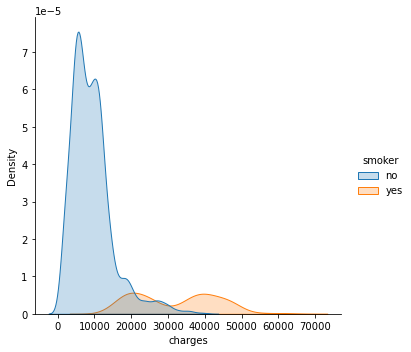

In [85]:
sns.displot(df, x= "charges", hue= "smoker", kind="kde",  fill=True)

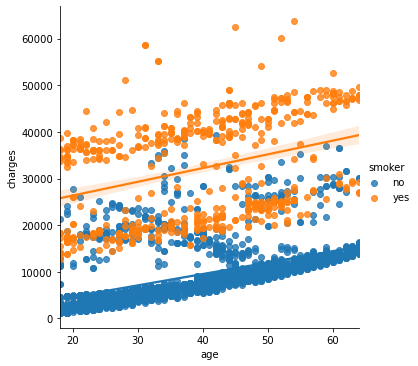

In [86]:
sns.lmplot(data= df, y= "charges", x= "age", hue= "smoker")

# Observation
* "Smoker" would surely play a vital role as charges distribution of smoker and non-smokers are quite seperate (and hence easy to estimate the charges).
* With feature non-smoker and age we could estimate charges with pretty good confidence, They seems to have linear relationship(blue circles in the bottom forming line shaped cluster).

(I wonder if we could use clustering algorithm like GMM to create more robust feature)

# Preprocessing

* Normalizing all continous feature values (applying log 1+) * Normalizing values are not working well in modeling phase, so we won't normalize the values
* Onehot encoding for categorical variables

In [87]:
'''
def apply_log_1p(df, type_= "train"):
  """
  Normalize all the continuous columns
  """
  # normalize all numeric values
  cont_col_list = ["charges", "age", "bmi"]
  for col in cont_col_list:
    if type_ == "test" and col == "charges":
      continue
    df[col] = np.log1p(df[col])

  df["children"] = np.log1p(df["children"])
  df_test["children"] = np.log1p(df_test["children"])

apply_log_1p(df)
apply_log_1p(df_test,  type_= "test")
'''

def one_hot_encode(df):
  """
  One hot encode categorical variables
  """
    
  # one-hot encoding categorical variables
  one_hot = pd.get_dummies(df[['sex', "smoker", "region"]])
  
  # drop the columns
  df = df.drop(['sex', "smoker", "region"],axis = 1)
  
  # join with original dataframe
  df = df.join(one_hot)
  
  return df

# to one-hot
df = one_hot_encode(df)
df_test = one_hot_encode(df_test)

# drop redundunt columns
df.drop(["weight_status", "stage_of_life"], inplace= True, axis= 1)
df_test.drop(["weight_status", "stage_of_life"], inplace= True, axis= 1)

# Train-validation split
* As I wanted the algorithm to see as many samples as possible, I validated on 5% of the data.

In [88]:
# target
y = df.pop("charges")

# features
X = df

# train validtaion split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.05, random_state=100)

# Training
We will be using extra trees here

In [89]:
# Extra tree regressor
'''
No hyper-parameter tuning is done, I encourage you to explore this phase
'''

etr = ExtraTreesRegressor(criterion='mse',
 max_depth= None,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators=100)

In [90]:
# train the model
etr.fit(X_train, y_train)
r_squared = etr.score(X_val, y_val)
print(f"R squared score on validation set: {r_squared}")

R squared score on validation set: 0.7045415827819752


In [91]:
# get the prediction on test set
pred_charges = etr.predict(df_test)

# to dataframe
df_submit = pd.DataFrame({"prediction": pred_charges})

# write to disk
df_submit.to_csv("submit.csv", index= False)

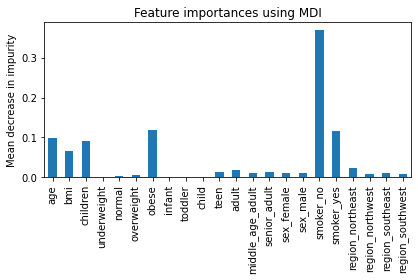

In [49]:
# Feature importance based on the mean decreasing in impurity within each tree
# Read more here: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importance-based-on-mean-decrease-in-impurity
importances = etr.feature_importances_
std = np.std([
    etr.feature_importances_ for tree in etr.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Observation
* Smoking played a vital role in predicting insurance charges followed by obese, age, children and BMI.

**The submission results in 3271.2 RMSE on public leaderboard. (The score might vary because trees are created randomly (using random features, samples and feature values))**

# Suggestions to improve the score
* More robust feature engineering and feature selection
* Using more data
* Hyper-parameter tuning and model selection
* Using deep learning based algorithms
* Ensemble learning